<a href="https://colab.research.google.com/github/Sweee2012/Netflix-EDA-Project/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("netflix_titles.csv")

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [7]:
# Handle Missing Values
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
# Convert 'date_added' to datetime format, handling invalid/missing values
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


<ipython-input-8-018d69933ab2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=content_type.index, y=content_type.values, palette='coolwarm')


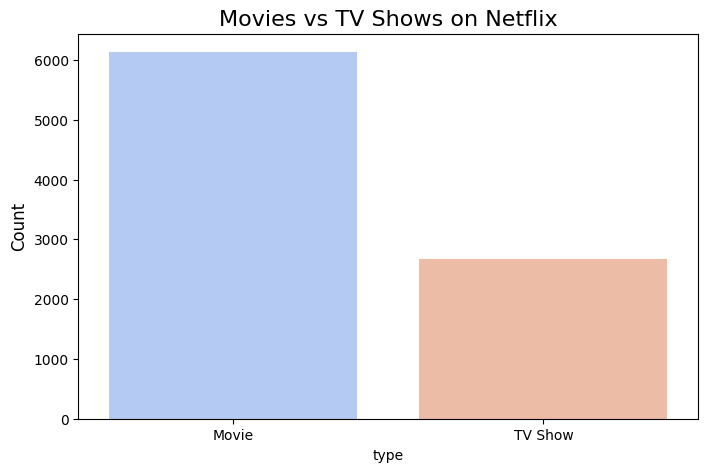

In [8]:
# Movies vs TV Shows
content_type = df['type'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=content_type.index, y=content_type.values, palette='coolwarm')
plt.title("Movies vs TV Shows on Netflix", fontsize=16)
plt.ylabel("Count", fontsize=12)
plt.show()


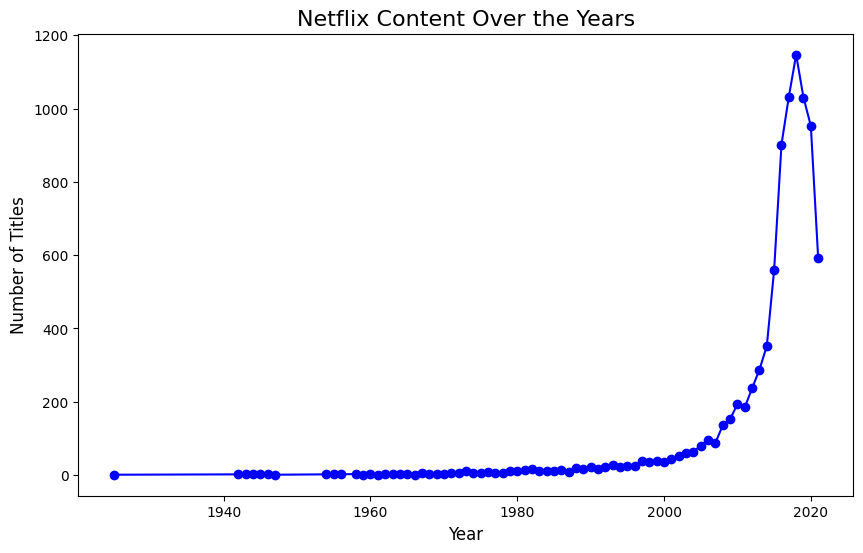

In [9]:
# Yearly Content Addition
df['release_year'] = df['release_year'].astype(int)
content_by_year = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
content_by_year.plot(kind='line', marker='o', color='b')
plt.title("Netflix Content Over the Years", fontsize=16)
plt.ylabel("Number of Titles", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.show()

<ipython-input-10-b22449ee2bde>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=genres.index, x=genres.values, palette='viridis')


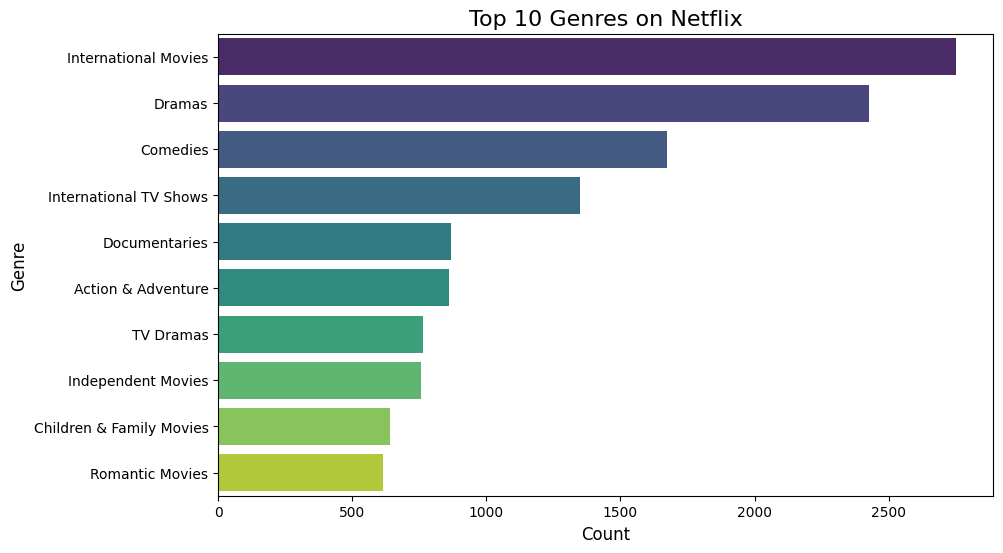

In [10]:
# Genre Distribution
df['listed_in'] = df['listed_in'].str.split(', ')
genres = df.explode('listed_in')['listed_in'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=genres.index, x=genres.values, palette='viridis')
plt.title("Top 10 Genres on Netflix", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Genre", fontsize=12)
plt.show()


<ipython-input-11-08daf085aa67>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='mako')


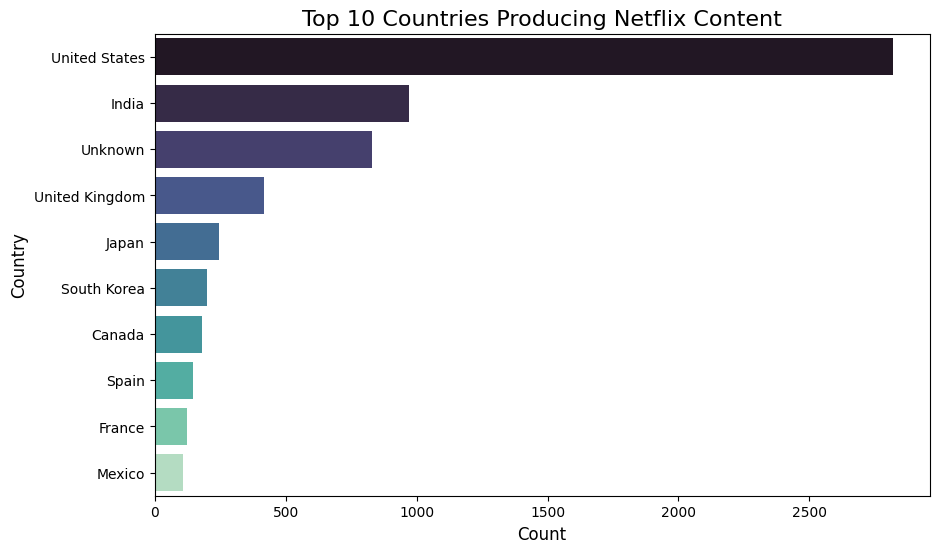

In [11]:
# Content by Country
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='mako')
plt.title("Top 10 Countries Producing Netflix Content", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.show()

<ipython-input-12-1bf4a7371503>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='cubehelix')


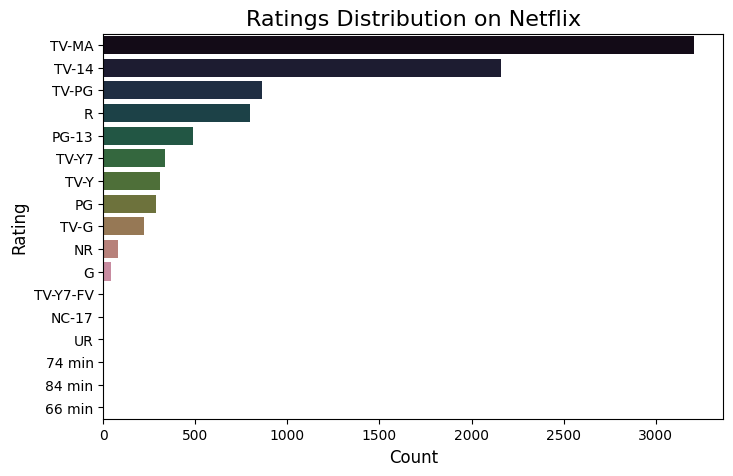

In [12]:
# Ratings Distribution
plt.figure(figsize=(8, 5))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='cubehelix')
plt.title("Ratings Distribution on Netflix", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Rating", fontsize=12)
plt.show()